Coletando: Wesley Safadão
Coletando: João Gomes
Coletando: Zé Vaqueiro
Coletando: Mari Fernandez
Coletando: Manu
Coletando: NATTAN
Coletando: Iguinho e Lulinha
Coletando: Os Barões Da Pisadinha
Coletando: Eric Land


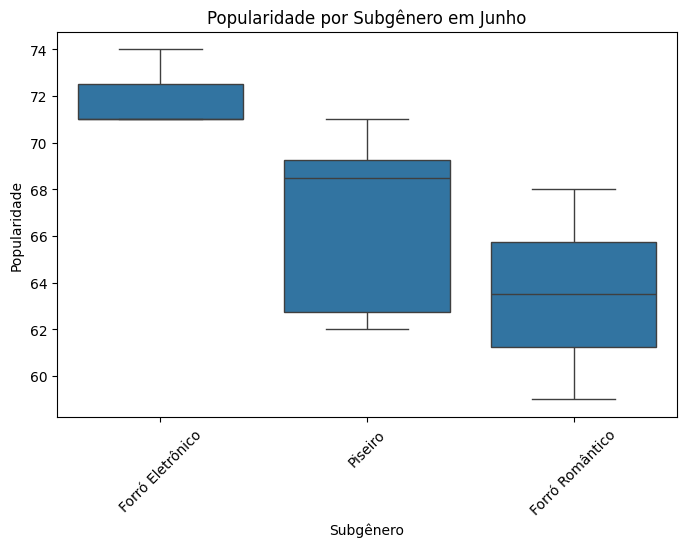

ANOVA Subgêneros em Junho: F=3.33, p=0.0779


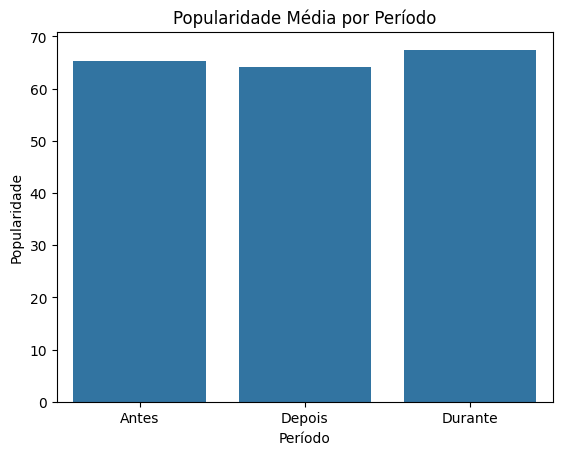

   Período  Popularidade
0    Antes     65.250000
1   Depois     64.204082
2  Durante     67.461538
Correlação em Junho:
               Duração  Popularidade
Duração       1.000000     -0.467413
Popularidade -0.467413      1.000000
                            OLS Regression Results                            
Dep. Variable:           Popularidade   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     3.075
Date:                Thu, 07 Aug 2025   Prob (F-statistic):              0.107
Time:                        13:50:16   Log-Likelihood:                -35.883
No. Observations:                  13   AIC:                             75.77
Df Residuals:                      11   BIC:                             76.90
Df Model:                           1                                         
Covariance Type:            nonrobust                    

In [2]:
!pip install spotipy pandas matplotlib seaborn statsmodels

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import time

# Autenticação
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id='f26993d0cdf1429884c58a6973faee77',
    client_secret='5c93890c9f8e4c64b95e011daa540216'
))

# Artistas e seus subgêneros
artistas = {
    'Wesley Safadão': 'Forró Eletrônico',
    'João Gomes': 'Piseiro',
    'Zé Vaqueiro': 'Piseiro',
    'Mari Fernandez': 'Piseiro',
    'Manu': 'Forró Romântico',
    'NATTAN': 'Forró Eletrônico',
    'Iguinho e Lulinha': 'Forró Romântico',
    'Os Barões Da Pisadinha': 'Piseiro',
    'Eric Land': 'Forró Eletrônico'
}

dados = []

for nome, subgenero in artistas.items():
    print(f"Coletando: {nome}")
    try:
        res = sp.search(q=f'artist:{nome}', type='artist', limit=1)
        if not res['artists']['items']:
            continue
        artista_id = res['artists']['items'][0]['id']

        top = sp.artist_top_tracks(artista_id, country='BR')['tracks']
        for faixa in top:
            nome_musica = faixa['name']
            pop = faixa['popularity']
            data = faixa['album']['release_date']
            duracao = faixa['duration_ms'] / 60000
            if len(data) >= 7:
                mes = int(data[5:7])
                if mes >= 1 and mes <= 12:
                    dados.append([nome, subgenero, nome_musica, pop, mes, duracao])
        time.sleep(0.5)
    except:
        continue

# Criar DataFrame
df = pd.DataFrame(dados, columns=['Artista', 'Subgênero', 'Música', 'Popularidade', 'Mês', 'Duração'])

# Classificar período
def periodo(mes):
    if mes < 6: return 'Antes'
    elif mes == 6: return 'Durante'
    else: return 'Depois'
df['Período'] = df['Mês'].apply(periodo)

# ------------------------
# PERGUNTA 1: Variação em Junho por Subgênero
# ------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['Mês'] == 6], x='Subgênero', y='Popularidade')
plt.title('Popularidade por Subgênero em Junho')
plt.xticks(rotation=45)
plt.show()

grupos = [g['Popularidade'].values for _, g in df[df['Mês'] == 6].groupby('Subgênero')]
f, p = stats.f_oneway(*grupos)
print(f"ANOVA Subgêneros em Junho: F={f:.2f}, p={p:.4f}")

# ------------------------
# PERGUNTA 2: Antes, Durante e Depois de Junho
# ------------------------
media = df.groupby('Período')['Popularidade'].mean().reset_index()
sns.barplot(data=media, x='Período', y='Popularidade')
plt.title('Popularidade Média por Período')
plt.show()
print(media)

# ------------------------
# PERGUNTA 3: Correlação Duração x Popularidade em Junho
# ------------------------
junho = df[df['Mês'] == 6]
correlacao = junho[['Duração', 'Popularidade']].corr()
print("Correlação em Junho:")
print(correlacao)

# Regressão Linear
X = sm.add_constant(junho['Duração'])
modelo = sm.OLS(junho['Popularidade'], X).fit()
print(modelo.summary())
df.to_csv('forro_spotify_dados.csv', index=False)